In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as pf
from tqdm.notebook import tqdm
import scipy.integrate as si
from matplotlib import gridspec
!jt -t grade3 -f fira -fs 13 -nf ptsans -nfs 11 -N -kl -cursw 5 -cursc r -cellw 90% -T
#Fancy config for plots.
# try:
#     !pip install jupyterthemes
#     !pip install --upgrade jupyterthemes
from jupyterthemes import jtplot
jtplot.style(theme='grade3')
# plt.style.use('seaborn-colorblind')
#     plt.style.use('bmh')
#     jtplot.style('monokai')

jtplot.style(grid=False, ticks=True, spines=True,gridlines='--')
from matplotlib import rcParams,rc
# rcParams['font.family'] = 'sans-serif'
# rcParams['font.sans-serif'] = ['Cormorant Infant']
rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.family": "sans",
    "font.serif": ["Palatino"],
    "font.sans-serif": ["Palatino"]
})
rcParams["legend.fancybox"] = True
rcParams["legend.frameon"] = True
rcParams["legend.framealpha"] = 0.25
rcParams["legend.facecolor"] = "black"
rcParams["legend.fontsize"] = 12
rcParams["axes.labelsize"] = 16
rcParams["grid.color"] = 'gray'
rcParams["grid.linestyle"] ='--'
rcParams["grid.alpha"] =0.5
rcParams['figure.figsize'] = (9.0, 6.0)
#     rcParams['font.sans-serif'] = ['Garamond']
plt.rc('xtick', labelsize=18)#,color="magenta")
plt.rc('ytick', labelsize=18)#,color="magenta")
#     rc('text', usetex=True)
# except:
#     pass
# params = {'axes.labelsize': 18,'axes.titlesize':20, 'text.fontsize': 20, 'legend.fontsize': 20, 'xtick.labelsize': 28, 'ytick.labelsize': 40}
# matplotlib.rcParams.update(params)

In [77]:
import seaborn as sns
# sns.set_style("white")
# sns.set_style("ticks")
# sns.set_context("talk")
sns.set_context("poster")
# sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})


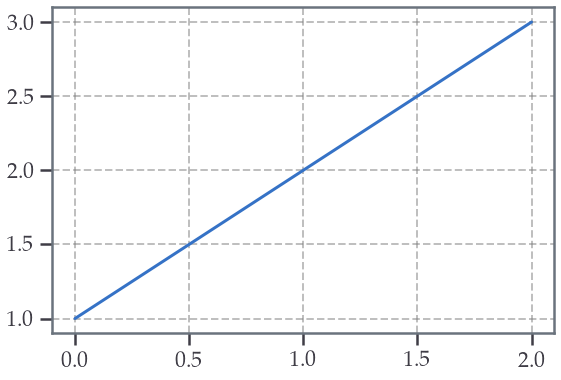

In [79]:
plt.plot([1,2,3])
plt.grid()

In [25]:
%matplotlib inline

In [80]:
# dfR = pd.read_csv("/home/sagauga/Cozy Drive/Research/splus_data/machine_learning/rerun/R_mfmtk91kur_SS8_SK10_segS80_RP2_splus_zoo_E_S_S0_revised_update_probs.csv")
dfR = pd.read_csv("/run/media/sagauga/unreal/astronomical_data/splus_cuts_rerun/cut_FULL_SAMPLE/filelist_zoo_amb_blind/R_mfmtk_experiment_kmaps/R_mfmtk_kur_K2D_splus_zoo_experiment.csv")

In [8]:
F20,F50,F70,F90 = np.asarray(eval((dfR.FLUX_RADIUS.iloc[2])))

In [9]:
dfR.shape[0]

8439

In [5]:
F20 = []
F50 = []
F70 = []
F90 = []
for i in range(dfR.shape[0]): 
    _F20,_F50,_F70,_F90 = np.asarray(eval((dfR.FLUX_RADIUS.iloc[i])))
    F20.append(_F20)
    F50.append(_F50)
    F70.append(_F70)
    F90.append(_F90)
F20 = np.asarray(F20)
F50 = np.asarray(F50)
F70 = np.asarray(F70)
F90 = np.asarray(F90)

In [6]:
dfR["F20"],dfR["F50"],dfR["F70"],dfR["F90"] = F20,F50,F70,F90

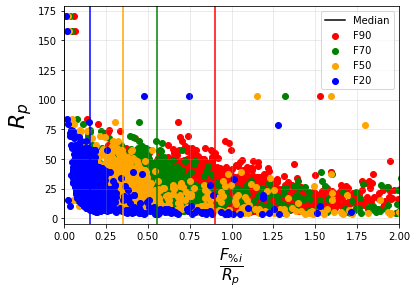

In [7]:
plt.scatter(dfR.F90/dfR.Rp,dfR.Rp,label="F90",color="red")
plt.scatter(dfR.F70/dfR.Rp,dfR.Rp,label="F70",color="green")
plt.scatter(dfR.F50/dfR.Rp,dfR.Rp,label="F50",color="orange")
plt.scatter(dfR.F20/dfR.Rp,dfR.Rp,label="F20",color="blue")

plt.axvline(np.median(dfR.F20/dfR.Rp),color="blue")
plt.axvline(np.median(dfR.F50/dfR.Rp),color="orange")
plt.axvline(np.median(dfR.F70/dfR.Rp),color="green")
plt.axvline(np.median(dfR.F90/dfR.Rp),color="red")
plt.axvline([0],color="black",label="Median")
plt.xlim(0.0,2.0)
plt.xlabel(r"$\frac{F_{\%i}}{R_p}$",fontsize=22)
plt.ylabel(r"$R_p$",fontsize=22)
plt.legend()
plt.grid(alpha=0.3)
# plt.savefig("../outputs/plots/comparison_splus_fluxes_with_Rp_mfmtk.pdf",dpi=600,bbox_inches='tight')

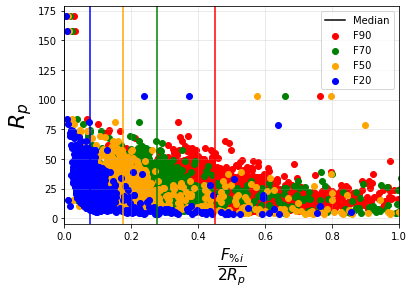

In [8]:
plt.scatter(dfR.F90/(2*dfR.Rp),dfR.Rp,label="F90",color="red")
plt.scatter(dfR.F70/(2*dfR.Rp),dfR.Rp,label="F70",color="green")
plt.scatter(dfR.F50/(2*dfR.Rp),dfR.Rp,label="F50",color="orange")
plt.scatter(dfR.F20/(2*dfR.Rp),dfR.Rp,label="F20",color="blue")

plt.axvline(np.median(dfR.F20/(2*dfR.Rp)),color="blue")
plt.axvline(np.median(dfR.F50/(2*dfR.Rp)),color="orange")
plt.axvline(np.median(dfR.F70/(2*dfR.Rp)),color="green")
plt.axvline(np.median(dfR.F90/(2*dfR.Rp)),color="red")
plt.axvline([0],color="black",label="Median")
plt.xlim(0.0,1.0)
plt.xlabel(r"$\frac{F_{\%i}}{2R_p}$",fontsize=22)
plt.ylabel(r"$R_p$",fontsize=22)
plt.legend()
plt.grid(alpha=0.3)
# plt.savefig("../outputs/plots/comparison_splus_fluxes_with_Rp_mfmtk.pdf",dpi=600,bbox_inches='tight')

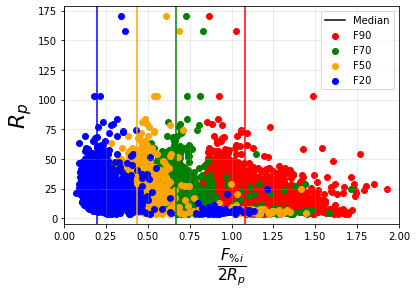

In [9]:
plt.scatter(dfR.R90/(dfR.Rp),dfR.Rp,label="F90",color="red")
plt.scatter(dfR.R70/(dfR.Rp),dfR.Rp,label="F70",color="green")
plt.scatter(dfR.R50/(dfR.Rp),dfR.Rp,label="F50",color="orange")
plt.scatter(dfR.R20/(dfR.Rp),dfR.Rp,label="F20",color="blue")

plt.axvline(np.median(dfR.R20/(dfR.Rp)),color="blue")
plt.axvline(np.median(dfR.R50/(dfR.Rp)),color="orange")
plt.axvline(np.median(dfR.R70/(dfR.Rp)),color="green")
plt.axvline(np.median(dfR.R90/(dfR.Rp)),color="red")
plt.axvline([0],color="black",label="Median")
plt.xlim(0.0,2.0)
plt.xlabel(r"$\frac{F_{\%i}}{2R_p}$",fontsize=22)
plt.ylabel(r"$R_p$",fontsize=22)
plt.legend()
plt.grid(alpha=0.3)
# plt.savefig("../outputs/plots/comparison_splus_fluxes_with_Rp_mfmtk.pdf",dpi=600,bbox_inches='tight')

In [17]:
dfR[["R90"]],2*dfR[["Rp"]]

(            R90
 0     39.766307
 1     36.773337
 2     20.387058
 3     15.311893
 4     13.663145
 ...         ...
 8424  11.574657
 8425  23.225823
 8426   9.774221
 8427  17.230990
 8428  30.350677
 
 [8429 rows x 1 columns],
              Rp
 0     48.612351
 1     51.278442
 2     39.255922
 3     23.396713
 4     24.966687
 ...         ...
 8424  20.896723
 8425  38.438151
 8426  17.913655
 8427  25.718647
 8428  57.801137
 
 [8429 rows x 1 columns])

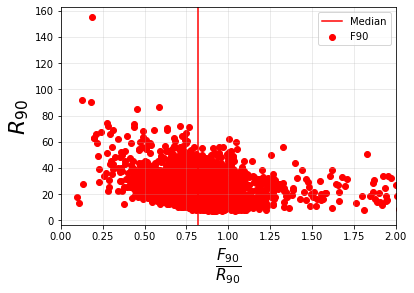

In [108]:
plt.scatter(dfR.F90/(dfR.R90),dfR.R90,label="F90",color="red")
plt.axvline(np.median(dfR.F90/(dfR.R90)),color="red",label="Median")
# plt.axvline([0],color="black",label="red")
plt.xlim(0.0,2.0)
plt.xlabel(r"$\frac{F_{90}}{R_{90}}$",fontsize=22)
plt.ylabel(r"$R_{90}$",fontsize=22)
plt.legend()
plt.grid(alpha=0.3)
plt.savefig("../outputs/plots/comparison_splus_flux90_with_R90_mfmtk.pdf",dpi=600,bbox_inches='tight')

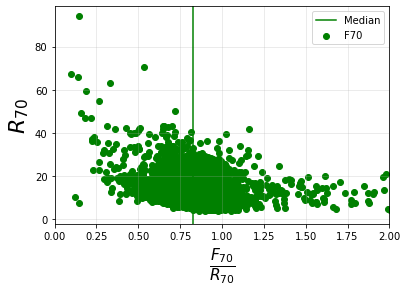

In [109]:
plt.scatter(dfR.F70/(dfR.R70),dfR.R70,label="F70",color="green")
plt.axvline(np.median(dfR.F70/(dfR.R70)),color="green",label="Median")
# plt.axvline([0],color="black",label="red")
plt.xlim(0.0,2.0)
plt.xlabel(r"$\frac{F_{70}}{R_{70}}$",fontsize=22)
plt.ylabel(r"$R_{70}$",fontsize=22)
plt.legend()
plt.grid(alpha=0.3)
plt.savefig("../outputs/plots/comparison_splus_flux70_with_R70_mfmtk.pdf",dpi=600,bbox_inches='tight')

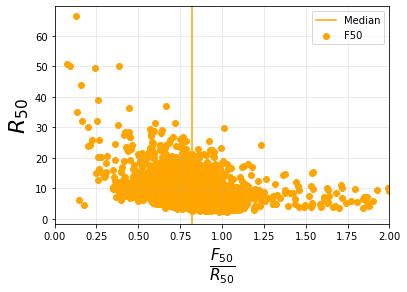

In [110]:
plt.scatter(dfR.F50/(dfR.R50),dfR.R50,label="F50",color="orange")
plt.axvline(np.median(dfR.F50/(dfR.R50)),color="orange",label="Median")
# plt.axvline([0],color="black",label="red")
plt.xlim(0.0,2.0)
plt.xlabel(r"$\frac{F_{50}}{R_{50}}$",fontsize=22)
plt.ylabel(r"$R_{50}$",fontsize=22)
plt.legend()
plt.grid(alpha=0.3)
plt.savefig("../outputs/plots/comparison_splus_flux50_with_R50_mfmtk.pdf",dpi=600,bbox_inches='tight')

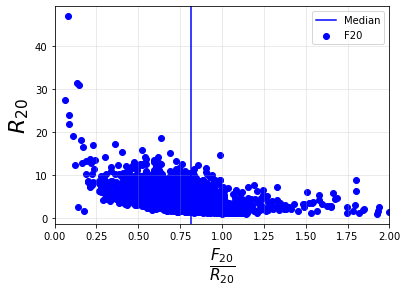

In [111]:
plt.scatter(dfR.F20/(dfR.R20),dfR.R20,label="F20",color="blue")
plt.axvline(np.median(dfR.F20/(dfR.R20)),color="blue",label="Median")
# plt.axvline([0],color="black",label="red")
plt.xlim(0.0,2.0)
plt.xlabel(r"$\frac{F_{20}}{R_{20}}$",fontsize=22)
plt.ylabel(r"$R_{20}$",fontsize=22)
plt.legend()
plt.grid(alpha=0.3)
plt.savefig("../outputs/plots/comparison_splus_flux20_with_R20_mfmtk.pdf",dpi=600,bbox_inches='tight')

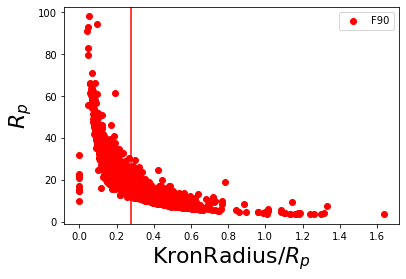

In [112]:
plt.scatter(dfR.KRON_RADIUS/dfR.Rp,dfR.Rp,label="F90",color="red")

plt.axvline(np.median(dfR.KRON_RADIUS/dfR.Rp),color="red")

# plt.xlim(0.0,2.0)
plt.xlabel(r"KronRadius$/R_p$",fontsize=22)
plt.ylabel(r"$R_p$",fontsize=22)
plt.legend()

# Non parametric quantities

In [81]:
# df_report.set_index("#rootname910                                      ")
# df_report["ID"] = df_report["#rootname910"].str.strip().str.replace("_R","")
# df_report["Index"] = df_report.ID
# df_report = df_report.set_index("Index")

# dfR = pd.read_csv("/home/sagauga/Cozy Drive/Research/splus_data/machine_learning/R_mfmmtk91_RP15_segK90_segS50_sssr1015_zoo_splus.csv")
# dfR_S0 = pd.read_csv("/home/sagauga/Cozy Drive/Research/splus_data/machine_learning/R_mfmmtk91_RP15_segK90_segS50_sssr1015_zoo_splus_S0decals_c.csv")
# dfR = pd.read_csv("/home/sagauga/Cozy Drive/Research/splus_data/machine_learning/rerun/R_mfmtk91_SS8_SK10_segS18_RP2_splus_zoo_E_S_S0_probs.csv")
# dfR = pd.read_csv(path+"R_mfmtk91_SS8_SK10_segS40_RP3_splus_zoo_E_S_S0_probs.csv")
# dfR = pd.read_csv("../../splus-ml/catalogs/R_gclean_0.8_5_mfmtk91_SS8_SK10_segS80_RP2_new_CASGM.csv")
# dfR = pd.read_csv("/media/sagauga/unreal/astronomical_data/splus_cuts_rerun/cut_FULL_SAMPLE/filelist_zoo_amb_blind/R_mfmtk_experiment_kmaps/R_mfmtk_splus_zoo_experiment.csv")
dfR_ = pd.read_csv("/run/media/sagauga/unreal/astronomical_data/splus_cuts_rerun/cut_FULL_SAMPLE/filelist_zoo_amb_blind/R_mfmtk_experiment_kmaps/R_mfmtk_kur_K2D_splus_zoo_experiment.csv")

# dfR = pd.read_csv("/home/sagauga/Cozy Drive/Research/splus_data/machine_learning/ls/r_mfmtk_new_legacy_survey_E_S_S0.csv")
# dfR_S0_ = pd.read_csv("/home/sagauga/Cozy Drive/Research/splus_data/machine_learning/rerun/R_mfmtk91_SS8_SK10_segS18_RP2_slus_zoo_S0.csv")
dfR_["Index"] = dfR_["#rootname910"]
dfR_ = dfR_.set_index("Index")

dfR = dfR_#.loc[dfR_["peaks_flag"]==0 ]

mag_limit,rpetro = 20,'R_petro'
dfR_S0 = dfR.loc[((dfR['LENTICULAR']==1)) & (dfR[rpetro]<=mag_limit) & (dfR["QF"]==0)]
dfR_S0EO = dfR.loc[((dfR['LENTICULAR_EO']==1)) & (dfR[rpetro]<=mag_limit) & (dfR["QF"]==0)]
dfR_S0FO = dfR.loc[((dfR['LENTICULAR_FO']==1)) & (dfR[rpetro]<=mag_limit) & (dfR["QF"]==0)]
dfR_Er = dfR.loc[(dfR['ELLIPTICAL']==1) & (dfR[rpetro]<=mag_limit) & (dfR["QF"]==0)]# & (dfR['QF']==0)]
dfR_S = dfR.loc[(dfR['SPIRAL']==1) & (dfR[rpetro]<=mag_limit) & (dfR["QF"]==0)]# & (dfR['QF']==0)]#15.7
dfR_U = dfR.loc[(dfR['UNCERTAIN']==1) & (dfR[rpetro]<=mag_limit)]# & (dfR['QF']==0)]
# dfR_S0 =  dfR_S0_#.loc[dfR[rpetro]<=mag_limit]

In [82]:
dfR_Er.shape[0], dfR_S.shape[0], dfR_S0.shape[0], dfR_S0EO.shape[0], dfR_S0FO.shape[0]

(1045, 2589, 770, 122, 648)

In [83]:
class_Er = ["1"]*dfR_Er.shape[0] #just to get the size of the data. 
class_S = ["2"]*dfR_S.shape[0]
class_S0 = ["3"]*dfR_S0.shape[0]
class_S0FO = ["4"]*dfR_S0FO.shape[0]
class_S0EO = ["5"]*dfR_S0EO.shape[0]

dfR_Er['class_'] = class_Er #1 > Elliptical
dfR_S['class_']  = class_S   #2 > Spiral
dfR_S0['class_'] = class_S0 #3 > Lenticular
dfR_S0FO['class_'] = class_S0FO #4 > Lenticular Face on
dfR_S0EO['class_'] = class_S0EO #5 > Lenticular Edge on

#create subgroups (double and triple)
dfR_Er_S0 = pd.concat([dfR_S0,dfR_Er])#E and S0 only
dfR_S_S0 = pd.concat([dfR_S,dfR_S0])#S and S0 only
dfR_Er_S = pd.concat([dfR_Er,dfR_S])#E and S only
dfR_Er_S_S0 = pd.concat([dfR_Er,dfR_S,dfR_S0])#all classes
dfR_Er_S_S0all = pd.concat([dfR_Er,dfR_S,dfR_Er_S_S0])#all classes
dfR_Er_S_S0FO = pd.concat([dfR_Er,dfR_S,dfR_S0FO])#all classes

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

In [84]:
CB = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']
# import seaborn as sns
# sns.set_theme(style="ticks")
# rcParams['figure.figsize'] = (9.0, 6.0)
path_save = "/media/sagauga/xfs_system1/GoogleDrive/GitLab/splus-ml/outputs/plots/new_processing/"

In [88]:
rcParams.update({
    "text.usetex": False,
    "font.family": "sans-serif",
    "font.family": "sans",
    "font.serif": ["Palatino"],
    "font.sans-serif": ["Palatino"]
})

In [89]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1.5,
"legend.fancybox": True,
"legend.frameon": True,
"legend.framealpha": 0.25,
"legend.facecolor": "black",
"legend.fontsize": 12,
"axes.labelsize": 16,
"grid.color": 'gray',
"grid.linestyle": '--',
"grid.alpha": 0.5,
"figure.figsize": (9.0, 6.0)})
# #                                                }
#                rcParams["legend.fancybox"] = True
# rcParams["legend.frameon"] = True
# rcParams["legend.framealpha"] = 0.25
# rcParams["legend.facecolor"] = "black"
# rcParams["legend.fontsize"] = 12
# rcParams["axes.labelsize"] = 16
# rcParams["grid.color"] = 'gray'
# rcParams["grid.linestyle"] ='--'
# rcParams["grid.alpha"] =0.5
# rcParams['figure.figsize'] = (9.0, 6.0)



(-3.0, 2.5)

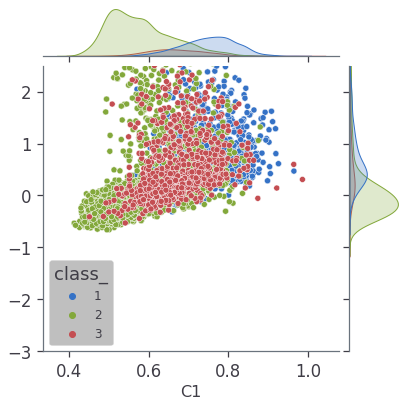

In [90]:
ylims=(-3,2.5)
sns.jointplot(data=dfR_Er_S_S0all,x=dfR_Er_S_S0all["C1"],y=(dfR_Er_S_S0all["BT_12"]-dfR_Er_S_S0all["BT_outer_T"]),hue="class_",
             ylim=ylims
             )#,aspect=1,height=5)
plt.ylim(ylims)

# plt.savefig(path_save+"C1_H_std_E_S_S0.pdf" ,dpi=600,bbox_inches='tight')
# plt.savefig(path_save+"C1_H_std_E_S_S0.svg" ,dpi=600,bbox_inches='tight')

(0.0, 0.75)

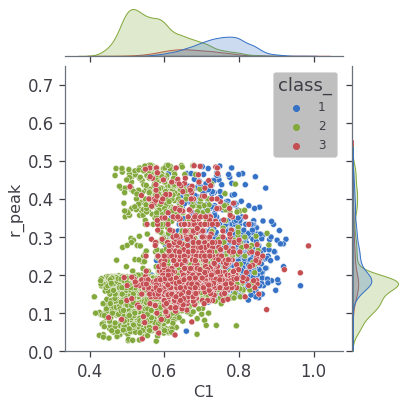

In [92]:
ylims=(0,0.75)
sns.jointplot(data=dfR_Er_S_S0all,x=dfR_Er_S_S0all["C1"],y=(dfR_Er_S_S0all["r_peak"]),hue="class_",
             ylim=ylims
             )#,aspect=1,height=5)
plt.ylim(ylims)

# plt.savefig(path_save+"C1_H_std_E_S_S0.pdf" ,dpi=600,bbox_inches='tight')
# plt.savefig(path_save+"C1_H_std_E_S_S0.svg" ,dpi=600,bbox_inches='tight')

(3.0, 30.5)

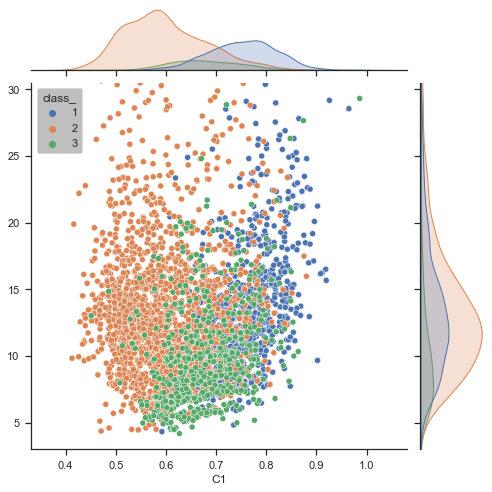

In [54]:
ylims=(3,30.5)
sns.jointplot(data=dfR_Er_S_S0all,x=dfR_Er_S_S0all["C1"],y=(dfR_Er_S_S0all["R50outer"]-dfR_Er_S_S0all["R501"]),hue="class_",height=7,
             ylim=ylims
             )#,aspect=1,height=5)
plt.ylim(ylims)

# plt.savefig(path_save+"C1_H_std_E_S_S0.pdf" ,dpi=600,bbox_inches='tight')
# plt.savefig(path_save+"C1_H_std_E_S_S0.svg" ,dpi=600,bbox_inches='tight')

(-0.75, 0.5)

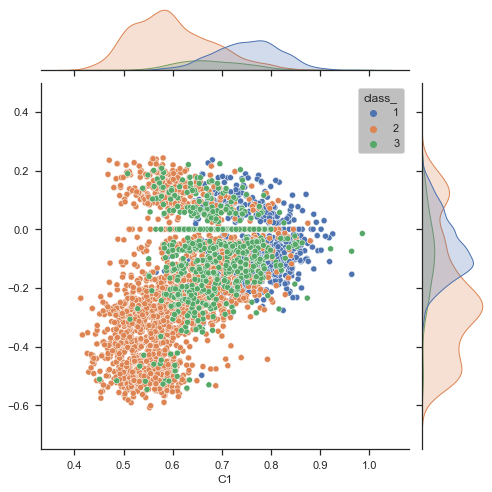

In [55]:
ylims=(-0.75,0.5)
sns.jointplot(data=dfR_Er_S_S0all,x=dfR_Er_S_S0all["C1"],y=(dfR_Er_S_S0all["R501"]-dfR_Er_S_S0all["R50inner"])/dfR_Er_S_S0all["R50"],hue="class_",height=7,
             ylim=ylims
             )#,aspect=1,height=5)
plt.ylim(ylims)

# plt.savefig(path_save+"C1_H_std_E_S_S0.pdf" ,dpi=600,bbox_inches='tight')
# plt.savefig(path_save+"C1_H_std_E_S_S0.svg" ,dpi=600,bbox_inches='tight')

(0.0, 20.5)

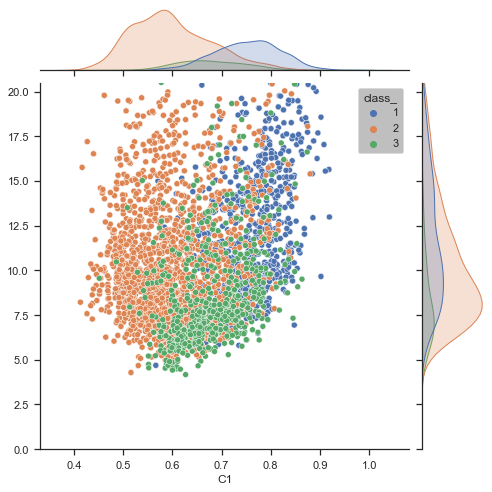

In [56]:
ylims=(0,20.5)
sns.jointplot(data=dfR_Er_S_S0all,x=dfR_Er_S_S0all["C1"],y=(dfR_Er_S_S0all["R502"]-dfR_Er_S_S0all["R501"]),hue="class_",height=7,
             ylim=ylims
             )#,aspect=1,height=5)
plt.ylim(ylims)

# plt.savefig(path_save+"C1_H_std_E_S_S0.pdf" ,dpi=600,bbox_inches='tight')
# plt.savefig(path_save+"C1_H_std_E_S_S0.svg" ,dpi=600,bbox_inches='tight')

(0.5, 2.5)

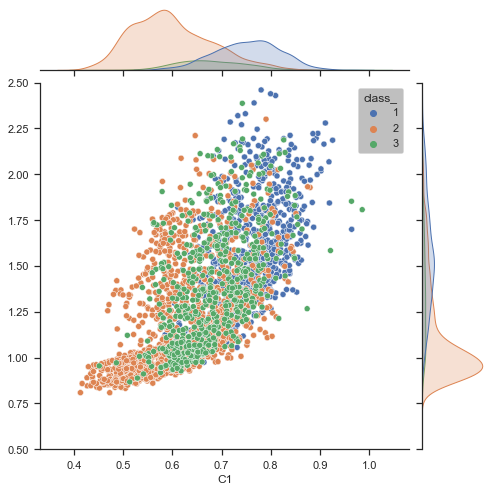

In [57]:
ylims=(0.5,2.5)
sns.jointplot(data=dfR_Er_S_S0all,x=dfR_Er_S_S0all["C1"],y=(dfR_Er_S_S0all["R502"]-dfR_Er_S_S0all["R501"])/dfR_Er_S_S0all["R50"],hue="class_",height=7,
             ylim=ylims
             )#,aspect=1,height=5)
plt.ylim(ylims)

# plt.savefig(path_save+"C1_H_std_E_S_S0.pdf" ,dpi=600,bbox_inches='tight')
# plt.savefig(path_save+"C1_H_std_E_S_S0.svg" ,dpi=600,bbox_inches='tight')

(0.0, 2.5)

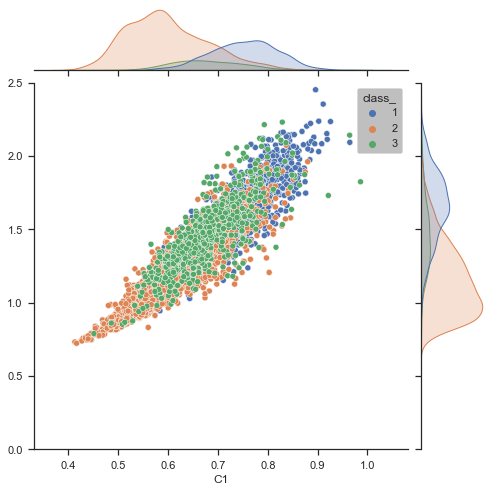

In [58]:
ylims=(0,2.5)
sns.jointplot(data=dfR_Er_S_S0all,x=dfR_Er_S_S0all["C1"],y=(dfR_Er_S_S0all["R50outer"]-dfR_Er_S_S0all["R50inner"])/dfR_Er_S_S0all["R50"],hue="class_",height=7,
             ylim=ylims
             )#,aspect=1,height=5)
plt.ylim(ylims)

# plt.savefig(path_save+"C1_H_std_E_S_S0.pdf" ,dpi=600,bbox_inches='tight')
# plt.savefig(path_save+"C1_H_std_E_S_S0.svg" ,dpi=600,bbox_inches='tight')

(0.0, 20.5)

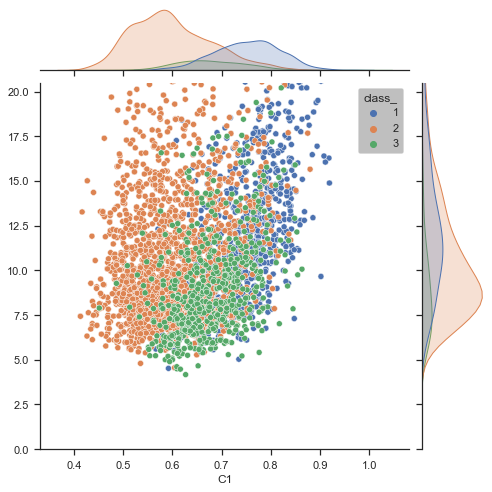

In [59]:
ylims=(0,20.5)
sns.jointplot(data=dfR_Er_S_S0all,x=dfR_Er_S_S0all["C1"],y=(dfR_Er_S_S0all["R50outer"]-dfR_Er_S_S0all["R50inner"]),hue="class_",height=7,
             ylim=ylims
             )#,aspect=1,height=5)
plt.ylim(ylims)

# plt.savefig(path_save+"C1_H_std_E_S_S0.pdf" ,dpi=600,bbox_inches='tight')
# plt.savefig(path_save+"C1_H_std_E_S_S0.svg" ,dpi=600,bbox_inches='tight')

(0.0, 0.5)

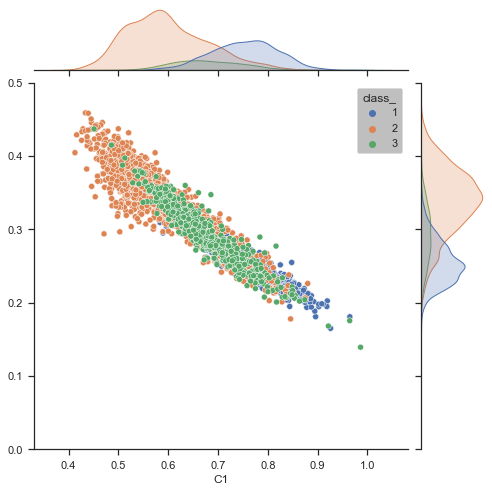

In [60]:
ylims=(0,0.5)
sns.jointplot(data=dfR_Er_S_S0all,x=dfR_Er_S_S0all["C1"],y=dfR_Er_S_S0all["R50inner"]/dfR_Er_S_S0all["R50outer"],hue="class_",height=7,
             ylim=ylims
             )#,aspect=1,height=5)
plt.ylim(ylims)

# plt.savefig(path_save+"C1_H_std_E_S_S0.pdf" ,dpi=600,bbox_inches='tight')
# plt.savefig(path_save+"C1_H_std_E_S_S0.svg" ,dpi=600,bbox_inches='tight')

(-3.0, -0.5)

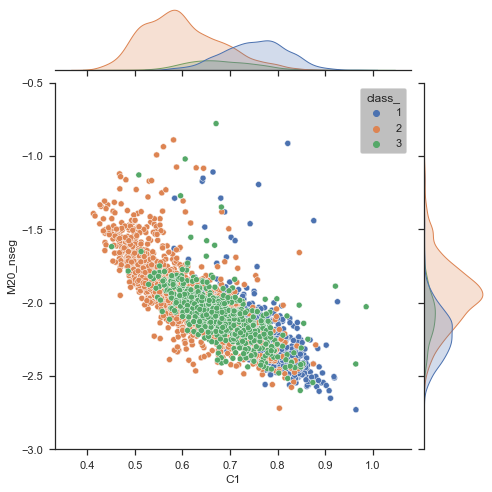

In [61]:
ylims=(-3,-0.5)
sns.jointplot(data=dfR_Er_S_S0all,x="C1",y="M20_nseg",hue="class_",height=7,
             ylim=ylims
             )#,aspect=1,height=5)
plt.ylim(ylims)

# plt.savefig(path_save+"C1_H_std_E_S_S0.pdf" ,dpi=600,bbox_inches='tight')
# plt.savefig(path_save+"C1_H_std_E_S_S0.svg" ,dpi=600,bbox_inches='tight')

(0.0, 0.5)

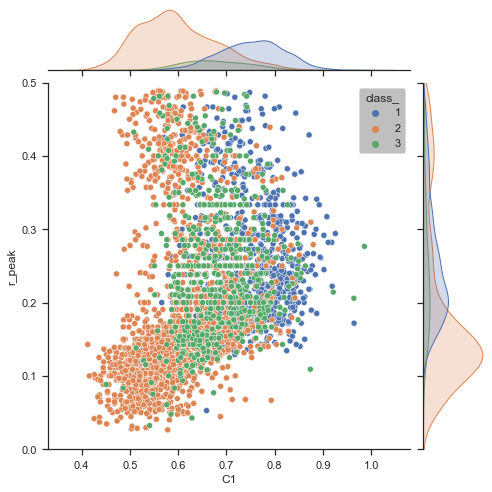

In [63]:
ylims=(0,0.5)
sns.jointplot(data=dfR_Er_S_S0all,x="C1",y="r_peak",hue="class_",height=7,
             ylim=ylims
             )#,aspect=1,height=5)
plt.ylim(ylims)

# plt.savefig(path_save+"C1_H_std_E_S_S0.pdf" ,dpi=600,bbox_inches='tight')
# plt.savefig(path_save+"C1_H_std_E_S_S0.svg" ,dpi=600,bbox_inches='tight')

(0.0, 1.0)

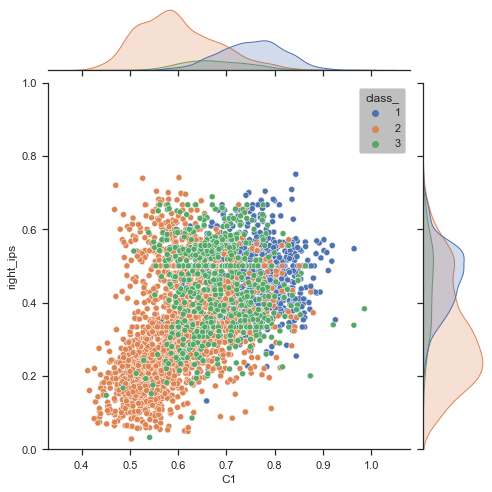

In [64]:
ylims=(0,1.0)
sns.jointplot(data=dfR_Er_S_S0all,x="C1",y="right_ips",hue="class_",height=7,
             ylim=ylims
             )#,aspect=1,height=5)
plt.ylim(ylims)

# plt.savefig(path_save+"C1_H_std_E_S_S0.pdf" ,dpi=600,bbox_inches='tight')
# plt.savefig(path_save+"C1_H_std_E_S_S0.svg" ,dpi=600,bbox_inches='tight')

(-0.1, 3.95)

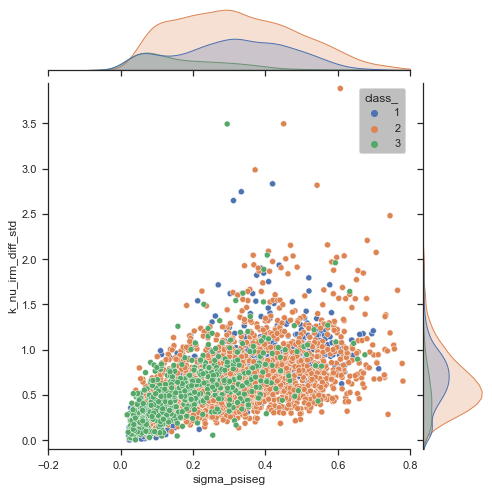

In [65]:

sns.jointplot(data=dfR_Er_S_S0all,x="sigma_psiseg",y="k_nu_irm_diff_std",hue="class_",height=7,
             xlim=(-0.2,0.8)
             )#,aspect=1,height=5)
plt.ylim(-.1,3.95)
# plt.savefig(path_save+"sigma_psi_k_nu_irm_diff_std_E_S_S0.pdf" ,dpi=600,bbox_inches='tight')
# plt.savefig(path_save+"sigma_psi_k_nu_irm_diff_std_E_S_S0.svg" ,dpi=600,bbox_inches='tight')
# plt.xlim(0.2,0.9)


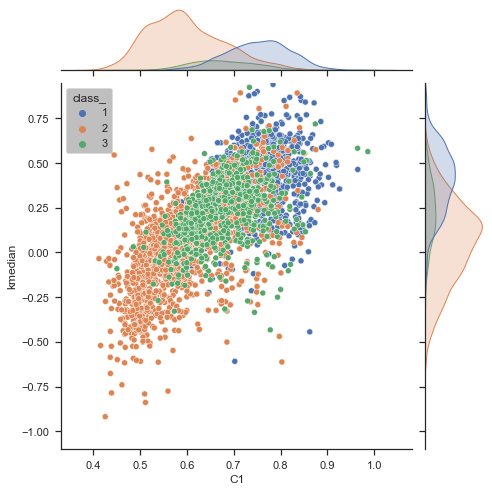

In [66]:

sns.jointplot(data=dfR_Er_S_S0all,x="C1",y="kmedian",hue="class_",height=7,
             ylim=(-1.1,0.95))#,aspect=1,height=5)
# plt.xlim(0.2,0.9)
# plt.savefig(path_save+"C1_kmedian_E_S_S0_ls.pdf" ,dpi=600,bbox_inches='tight')
# plt.savefig(path_save+"C1_kmedian_E_S_S0_ls.svg" ,dpi=600,bbox_inches='tight')


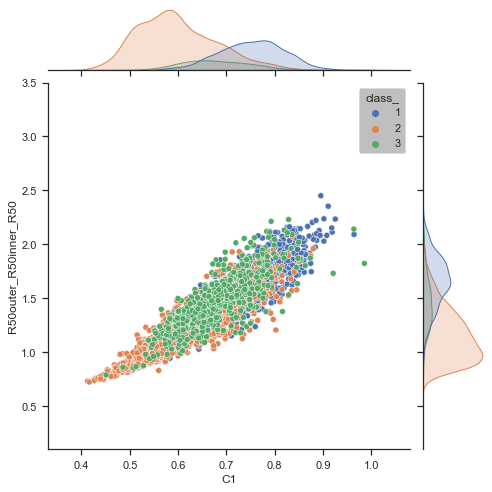

In [82]:

sns.jointplot(data=dfR_Er_S_S0all,x=dfR_Er_S_S0all["C1"],y=dfR_Er_S_S0all["R50outer_R50inner_R50"],hue="class_",height=7,
             ylim=(0.1,3.5))#,aspect=1,height=5)
# plt.xlim(0.2,0.9)
# plt.savefig(path_save+"C1_kmedian_E_S_S0_ls.pdf" ,dpi=600,bbox_inches='tight')
# plt.savefig(path_save+"C1_kmedian_E_S_S0_ls.svg" ,dpi=600,bbox_inches='tight')


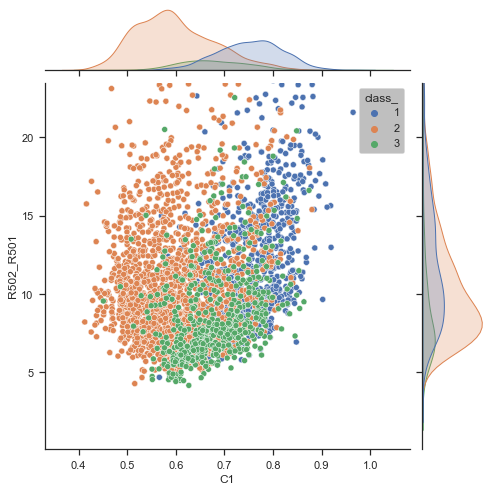

In [94]:

sns.jointplot(data=dfR_Er_S_S0all,x=dfR_Er_S_S0all["C1"],y=dfR_Er_S_S0all["R502_R501"],hue="class_",height=7,
             ylim=(0.1,23.5))#,aspect=1,height=5)
# plt.xlim(0.2,0.9)
# plt.savefig(path_save+"C1_kmedian_E_S_S0_ls.pdf" ,dpi=600,bbox_inches='tight')
# plt.savefig(path_save+"C1_kmedian_E_S_S0_ls.svg" ,dpi=600,bbox_inches='tight')


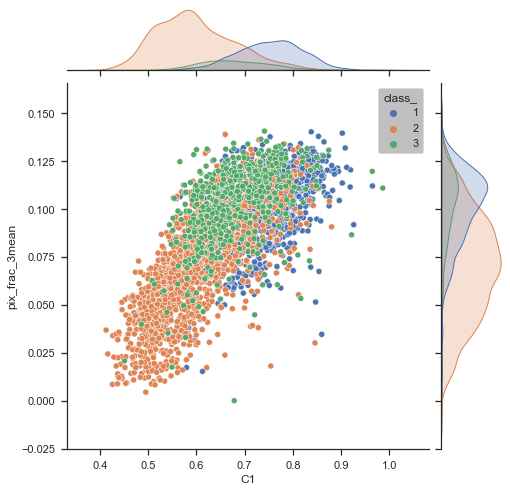

In [67]:

sns.jointplot(data=dfR_Er_S_S0all,x=(dfR_Er_S_S0all["C1"]),y=dfR_Er_S_S0all["pix_frac_3mean"],hue="class_",height=7,
#              ylim=(-0.01,0.15)
             )#,aspect=1,height=5)
# plt.ylim(-.1,3.95)
# plt.savefig(path_save+"sigma_psi_k_nu_irm_diff_std_E_S_S0.pdf" ,dpi=600,bbox_inches='tight')
# plt.savefig(path_save+"sigma_psi_k_nu_irm_diff_std_E_S_S0.svg" ,dpi=600,bbox_inches='tight')
# plt.xlim(0.2,0.9)


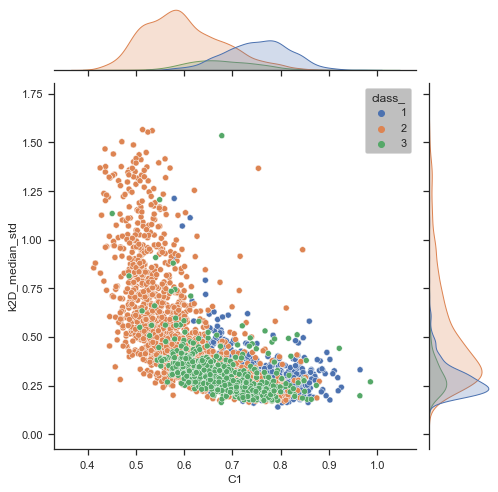

In [68]:

sns.jointplot(data=dfR_Er_S_S0all,x=(dfR_Er_S_S0all["C1"]),y=dfR_Er_S_S0all["k2D_median_std"],hue="class_",height=7,
#              xlim=(-0.0,1.15)
             )#,aspect=1,height=5)
# plt.ylim(-.1,3.95)
# plt.savefig(path_save+"sigma_psi_k_nu_irm_diff_std_E_S_S0.pdf" ,dpi=600,bbox_inches='tight')
# plt.savefig(path_save+"sigma_psi_k_nu_irm_diff_std_E_S_S0.svg" ,dpi=600,bbox_inches='tight')
# plt.xlim(0.2,0.9)


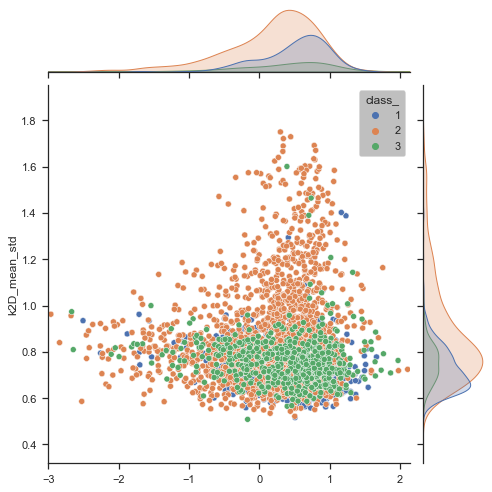

In [69]:

sns.jointplot(data=dfR_Er_S_S0all,x=(dfR_Er_S_S0all["A0seg"]-dfR_Er_S_S0all["A1seg"])/dfR_Er_S_S0all["A3seg"],y=dfR_Er_S_S0all["k2D_mean_std"],hue="class_",height=7,
             xlim=(-3.0,2.15)
             )#,aspect=1,height=5)
# plt.ylim(-.1,3.95)
# plt.savefig(path_save+"sigma_psi_k_nu_irm_diff_std_E_S_S0.pdf" ,dpi=600,bbox_inches='tight')
# plt.savefig(path_save+"sigma_psi_k_nu_irm_diff_std_E_S_S0.svg" ,dpi=600,bbox_inches='tight')
# plt.xlim(0.2,0.9)


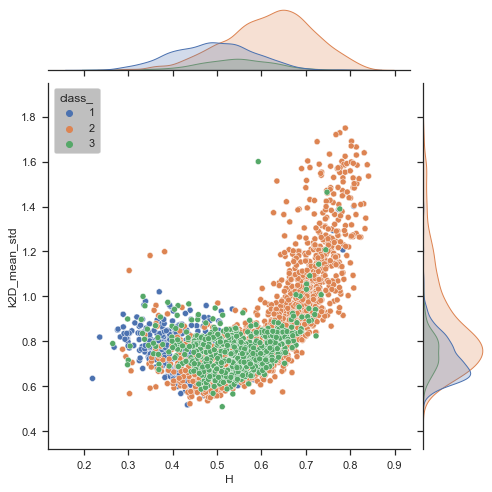

In [70]:

sns.jointplot(data=dfR_Er_S_S0all,x="H",y="k2D_mean_std",hue="class_",height=7,
#              ylim=(-0.0,0.15)
             )#,aspect=1,height=5)
# plt.ylim(-.1,3.95)
# plt.savefig(path_save+"sigma_psi_k_nu_irm_diff_std_E_S_S0.pdf" ,dpi=600,bbox_inches='tight')
# plt.savefig(path_save+"sigma_psi_k_nu_irm_diff_std_E_S_S0.svg" ,dpi=600,bbox_inches='tight')
# plt.xlim(0.2,0.9)
